In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)


(1, 229, 3157)


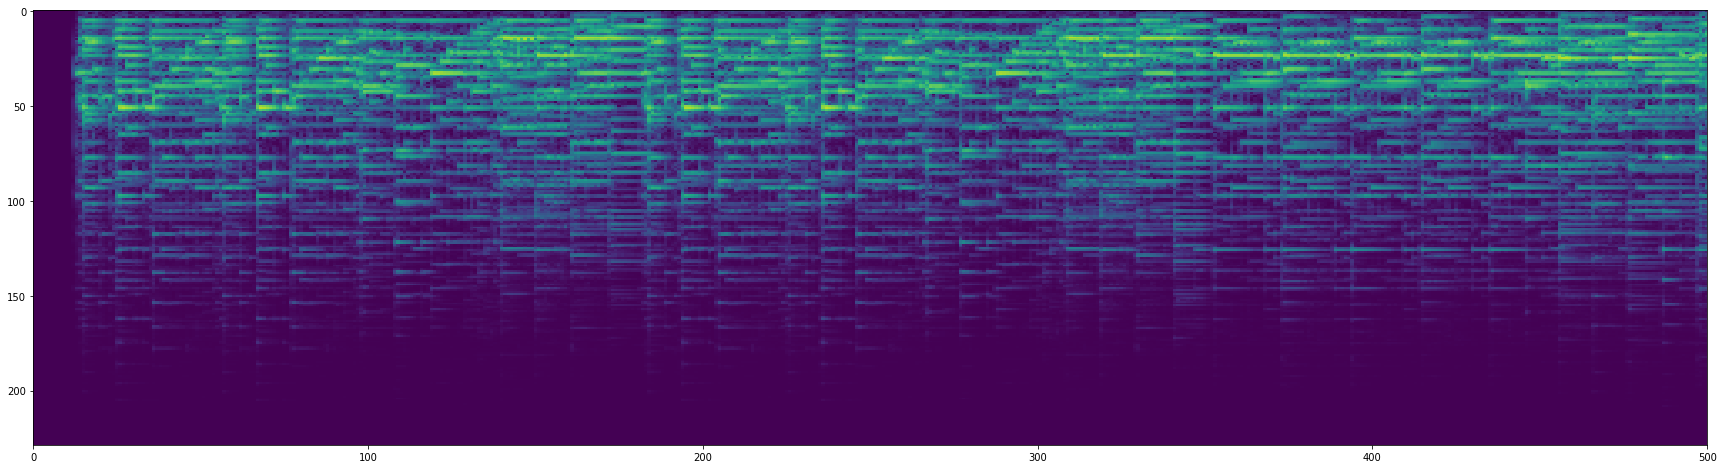

In [59]:
spec_kelz = np.load("./../../framewise_2016/dump_spectrograms/MAPS_MUS-scn16_7_SptkBGAm.wav.npy")
print(spec.shape)
fig, ax = plt.subplots()
ax.set_xlim(0, 500)
plt.imshow(spec_kelz.T, aspect="auto")

In [60]:
spec = np.load("./processed/maps_MAPS_MUS-scn16_7_SptkBGAm_kelz-fmin30-fmax8000-bands48-hop1764-uint16.npy")
spec.shape

(1, 229, 3157)

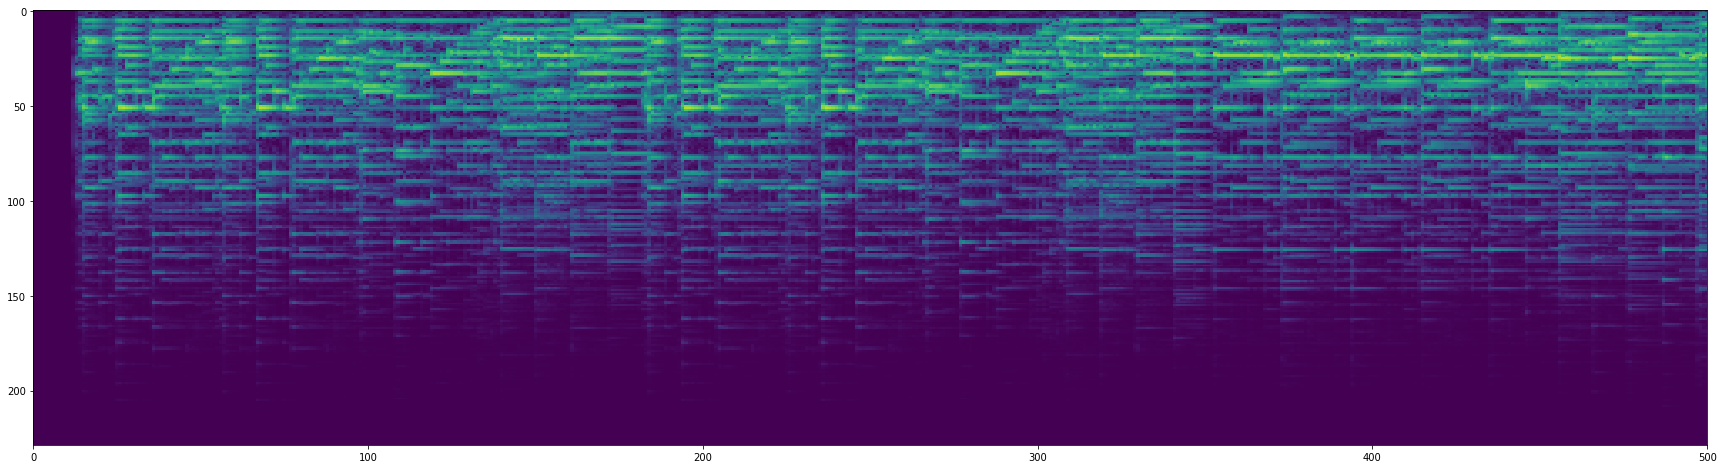

In [61]:
fig, ax = plt.subplots()
ax.set_xlim(0, 500)
plt.imshow(spec[0], aspect="auto")

In [50]:
spec2 = np.load("./processed/maps_MAPS_MUS-scn16_7_SptkBGAm_cqt-fmin32.7-oct9.0-octbins60-hop256-db110.0-fs1.0-uint16.npy")

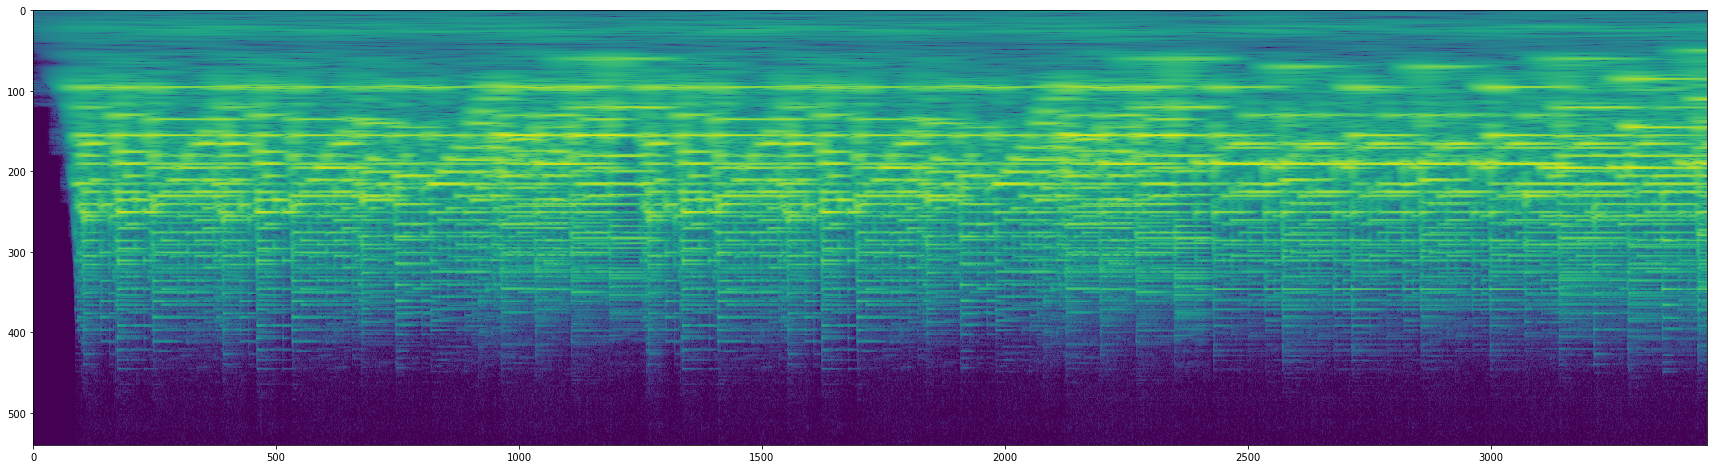

In [55]:
fig, ax = plt.subplots()
ax.set_xlim(0, 500*441*4/256)
plt.imshow(spec2[0], aspect="auto")

(88, 16768) [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


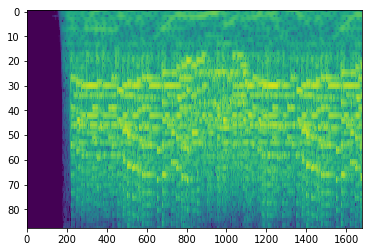

In [14]:
spec = np.load("./processed/musicnet_mir_1759_YunNingHung_cqt-fmin27.5-oct7.333333333333333-octbins12-hop512-db110-fs1.0-uint16.npy")
spec = spec[0]
#print(spec.shape, spec)
fig, ax = plt.subplots()
ax.set_xlim(0, spec.shape[1]*0.1)
plt.imshow(spec, aspect="auto")

(18, 312, 88, 1)


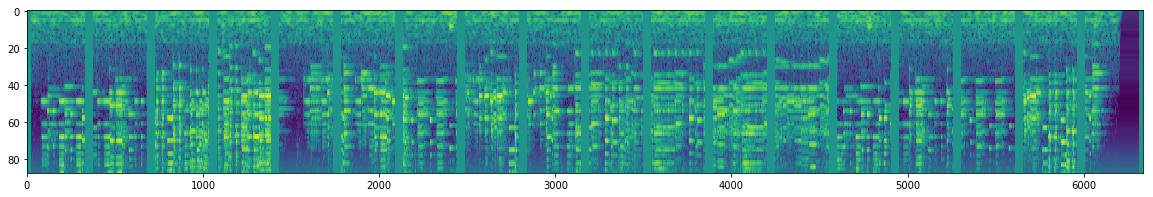

In [42]:
spec = np.load("../../instrument-prediction/Xte_predict.npy")
print(spec.shape)
aaa = np.pad(np.squeeze(spec, -1), ((0,0), (20,20), (0,0)))
one = np.concatenate(aaa, axis=0).T
fig, ax = plt.subplots()
#ax.set_xlim(0, one.shape[1]*0.3)
plt.imshow(one, aspect="auto")

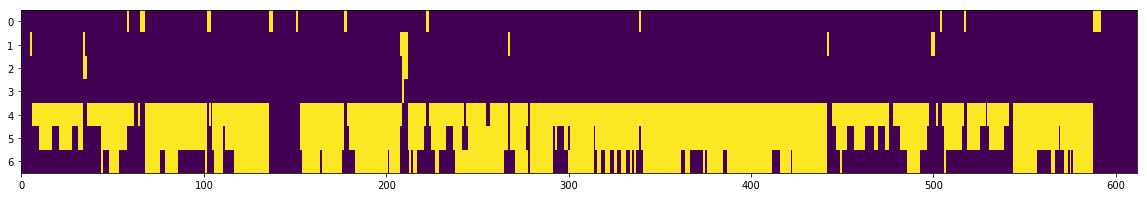

In [33]:
pred = np.load("../../instrument-prediction/result/1819.npy")
plt.imshow(pred, aspect="auto")

/home/jirka/miniconda3/envs/melody/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jirka/miniconda3/envs/melody/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jirka/miniconda3/envs/melody/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jirka/miniconda3/envs/melody/lib/python3

[[-1. -1. -1.]
 [-1. -1. -1.]
 [-1. -1. -1.]
 ...
 [ 8.  9.  6.]
 [ 8.  9.  6.]
 [ 8.  9.  6.]] 9.0 -1.0


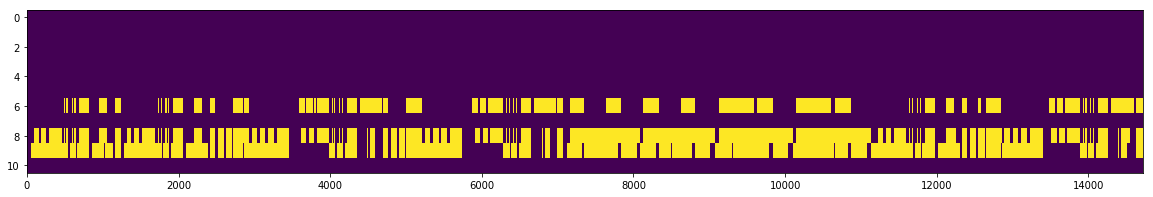

In [9]:
import datasets
import numpy as np

spec = np.load("./cached/musicnet_mir_1819_512.0.npz")
times, freqs, notes, voicing = spec.values()
ref_matrix = datasets.Annotation(times, freqs, notes, voicing).ref_matrix(11, 0)
print(notes, np.max(notes), np.min(notes))
notes = notes.T
fig, ax = plt.subplots()
#ax.set_xlim(0, 500)
#ax.set_ylim(0, 10)
plt.imshow(ref_matrix.T, aspect="auto")

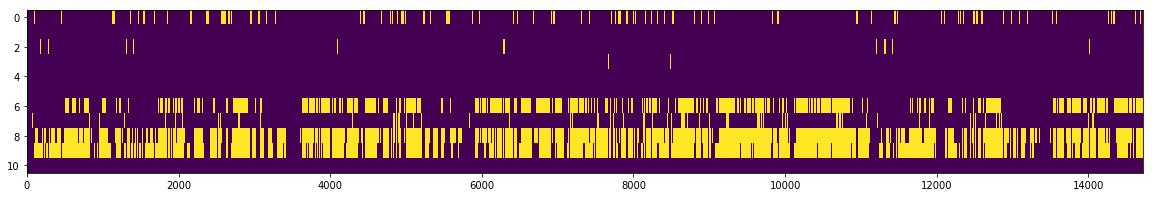

In [11]:
est = np.load("models/0313_130345-mir-sYunNingHung_cqt-sus0-sos0-aJY-b1/model-f0-saliences/musicnet_mir-test-melody-outputs/1819.npy")
plt.imshow(est.T>0.5, aspect="auto")

In [3]:
# musicnet instruments
from glob import glob
import csv
instruments = []
for annot_path in glob("./data/musicnet/*_labels/*.csv"):
    with open(annot_path, 'r') as f:

        reader = csv.DictReader(f, delimiter=',')
        for label in reader:
            start_time = int(label['start_time'])/44100
            end_time = int(label['end_time'])/44100

            # instrument = int(label['instrument'])
            # note = int(label['note'])
            # start_beat = float(label['start_beat'])
            # end_beat = float(label['end_beat'])
            # note_value = label['note_value']
            #if annot == "instrument":
            instrument = int(label['instrument'])
            instruments.append(instrument)
            # print(instrument)
                #tree[start_time:end_time] = instrument


In [4]:
len(instruments)

1089540

(array([     0., 633598.,      0.,      0.,      0.,      0.,      0.,
          4914.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0., 200467.,
         89288.,  91109.,   3006.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  11327.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,   8624.,
             0.,  14747.,  24150.,      0.,   8310.,      0.,      0.,
             0.,      0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41,

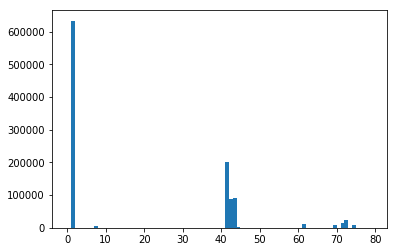

In [5]:
plt.hist(instruments, bins=np.arange(80))

In [6]:
sorted(list(set(instruments)))

[1, 7, 41, 42, 43, 44, 61, 69, 71, 72, 74]

In [ ]:

instrument_mappings = {
    1: {id: 0, instrument: "piano"},
    7: {id: 1, instrument: "harpsichord"},
    41: {id: 2, instrument: "violin"},
    42: {id: 3, instrument: "viola"},
    43: {id: 4, instrument: "cello"},
    44: {id: 5, instrument: "contrabass"},
    61: {id: 6, instrument: "french horn"},
    69: {id: 7, instrument: "oboe"},
    71: {id: 8, instrument: "bassoon"},
    72: {id: 9, instrument: "clarinet"},
    74: {id: 10, instrument: "flute"},
}


In [20]:
import visualization
import soundfile as sf
a

In [33]:
audio, sr_orig = sf.read("/home/jirka/bakalarka/music-transcription/datasets/../data/musicnet/train_data/1758.wav")

In [36]:
np.max(audio)

0.564483642578125

In [28]:
audio, sr_orig = sf.read("/home/jirka/bakalarka/music-transcription/datasets/../data/musicnet/train_data/1758.wav", dtype="int16")

In [ ]:
visualization.samplesplayer(audio[:88000*5], sr_orig)

In [26]:
sr_orig

44100

In [ ]:
visualization.audioplayer("/home/jirka/bakalarka/music-transcription/datasets/../data/musicnet/train_data/1758.wav")

In [ ]:
np.load("processed/musicnet_mir_1807")